In [4]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

cmap = plt.get_cmap('Set1')

Stats = ['simSeconds ',
'hostSeconds ',
'system.mem_ctrl.readReqs ',
'system.mem_ctrl.writeReqs ',
'system.mem_ctrl.servicedByWrQ ',
'system.mem_ctrl.mergedWrBursts ',
'system.mem_ctrl.numTotHits ',
'system.mem_ctrl.numTotMisses ',
'system.mem_ctrl.numColdMisses ',
'system.mem_ctrl.numHotMisses ',
'system.mem_ctrl.numRdMissClean ',
'system.mem_ctrl.numRdMissDirty ',
'system.mem_ctrl.numRdHit ',
'system.mem_ctrl.numWrMissClean ',
'system.mem_ctrl.numWrMissDirty ',
'system.mem_ctrl.numWrHit ',
'system.mem_ctrl.numRdHitDirty ',
'system.mem_ctrl.numRdHitClean ',
'system.mem_ctrl.numWrHitDirty ',
'system.mem_ctrl.numWrHitClean ',
'system.o3Cpu0.thread_0.numInsts ',
'system.o3Cpu1.thread_0.numInsts ',
'system.o3Cpu2.thread_0.numInsts ',
'system.o3Cpu3.thread_0.numInsts ',
'system.o3Cpu4.thread_0.numInsts ',
'system.o3Cpu5.thread_0.numInsts ',
'system.o3Cpu6.thread_0.numInsts ',
'system.o3Cpu7.thread_0.numInsts ',
'system.mem_ctrl.avgRdBWSys ',
'system.mem_ctrl.avgWrBWSys ',
'system.mem_ctrl.avgORBLen ',
'system.far_mem_ctrl.avgRdBWSys ',
'system.far_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.avgRdBWSys ',
'system.loc_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.dram.readBursts ',
'system.loc_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram_2.readBursts ',
'system.loc_mem_ctrl.dram_2.writeBursts ',
'system.far_mem_ctrl.dram.readBursts ',
'system.far_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram.avgRdBW ',
'system.loc_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram_2.avgRdBW ',
'system.loc_mem_ctrl.dram_2.avgWrBW ',
'system.far_mem_ctrl.dram.avgRdBW ',
'system.far_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram.busUtil ',
'system.loc_mem_ctrl.dram.busUtilRead ',
'system.loc_mem_ctrl.dram.busUtilWrite ',
'system.loc_mem_ctrl.dram_2.busUtil ',
'system.loc_mem_ctrl.dram_2.busUtilRead ',
'system.loc_mem_ctrl.dram_2.busUtilWrite ',
'system.far_mem_ctrl.dram.busUtil ',
'system.far_mem_ctrl.dram.busUtilRead ',
'system.far_mem_ctrl.dram.busUtilWrite ',
'system.far_mem_ctrl.dram.bytesRead  ',
'system.far_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram.bytesRead  ',
'system.loc_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram_2.bytesRead  ',
'system.loc_mem_ctrl.dram_2.bytesWritten  ',
'system.mem_ctrl.avgTimeTagCheckRes ',
'system.mem_ctrl.avgTimeTagCheckResRd ',
'system.mem_ctrl.avgTimeTagCheckResWr ',
'system.mem_ctrl.avgPktRespTimeRd ',
'system.mem_ctrl.avgPktRespTimeWr ',
'system.mem_ctrl.avgPktORBTime ',
'system.mem_ctrl.avgPktORBTimeRd ',
'system.mem_ctrl.avgPktORBTimeWr ',
'system.mem_ctrl.avgTimeInLocRead ',
'system.mem_ctrl.avgTimeInLocWrite ',
'system.mem_ctrl.avgTimeInFarRead '
          ]

dfCols = [
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen',
         'farAvgRdBWSys',
         'farAvgWrBWSys',
         'locAvgRdBWSys',
         'locAvgWrBWSys',
         'readBursts1',
         'writeBursts1',
         'readBursts2',
         'writeBursts2',
         'readBursts3',
         'writeBursts3',
         'loc1AvgRdBW',
         'loc1AvgWrBW',
         'loc2AvgRdBW',
         'loc2AvgWrBW',
         'farAvgRdBW',
         'farAvgWrBW',
         'loc1BusUtil',
         'loc1BusUtilRead',
         'loc1BusUtilWrite',
         'loc2BusUtil',
         'loc2BusUtilRead',
         'loc2BusUtilWrite',
         'farBusUtil',
         'farBusUtilRead',
         'farBusUtilWrite',
         'farBytesRead',
         'farBytesWritten',
         'loc1BytesRead',
         'loc1BytesWritten',
         'loc2BytesRead',
         'loc2BytesWritten',
         'avgTimeTagCheckRes',
         'avgTimeTagCheckResRd',
         'avgTimeTagCheckResWr',
         'avgPktRespTimeRd',
         'avgPktRespTimeWr',
         'avgPktORBTime',
         'avgPktORBTimeRd',
         'avgPktORBTimeWr',
         'avgTimeInLocRead',
         'avgTimeInLocWrite',
         'avgTimeInFarRead'

         ]
##########################################################

def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

##########################################################

def creatDataFrame(dataDir, suite):
    app = []
    if suite == "GAPBS":
        app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']
    if suite == "NPB":
        app = ['bt', 'cg', 'ft', 'is', 'lu', 'mg', 'sp', 'ua']
    rows = []
    for a in app:
        stats = [a]
        for stat in Stats:
            time_file_path = '{}/{}/stats.txt'.format(dataDir, a)
            ret_line = getStat(time_file_path, stat)

            if ret_line != 0:
                #if ret_line=='nan' :
                #    stat_val = 0
                #else:
                stat_val = ret_line.split()[1]
            else:
                stat_val = 0
            stats.append(stat_val)

        rows.append(stats)
    df = pd.DataFrame(rows, columns= dfCols)
    df['totNumInsts'] = df['numInsts0'].astype(int)+df['numInsts1'].astype(int)+df['numInsts2'].astype(int)+df['numInsts3'].astype(int)+df['numInsts4'].astype(int)+df['numInsts5'].astype(int)+df['numInsts6'].astype(int)+df['numInsts7'].astype(int)
    df['totBW'] = (df['avgRdBWSys'].astype(float)+df['avgWrBWSys'].astype(float))/1000000000
    df['coldRate'] = (df['numColdMisses'].astype(float) / df['numTotMisses'].astype(float)) *100
    df['injRate'] = (df['readReqs'].astype(float) + df['writeReqs'].astype(float))*64/1000000000 / df['simSeconds'].astype(float)
    df['BIPS'] = (df['totNumInsts'].astype(float)/1000000000)/df['simSeconds'].astype(float)
    
    df['accAmp'] =  (df['farBytesRead'].astype(float) + df['farBytesWritten'].astype(float) +
                     df['loc1BytesRead'].astype(float) + df['loc1BytesWritten'].astype(float) + 
                     df['loc2BytesRead'].astype(float) + df['loc2BytesWritten'].astype(float)) / (df['readReqs'].astype(float) * 64 + df['writeReqs'].astype(float) * 64)
    
    df['BWBloat'] =  (df['loc1AvgRdBW'].astype(float) + df['loc1AvgWrBW'].astype(float) +
                      df['loc2AvgRdBW'].astype(float) + df['loc2AvgWrBW'].astype(float) +
                      df['farAvgRdBW'].astype(float) + df['farAvgWrBW'].astype(float)) / ((df['avgRdBWSys'].astype(float) + df['avgWrBWSys'].astype(float)) / 1000000)
    return df

In [5]:
df_gap22_dc_ram = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/rambus_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_ram = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/rambus_g22_nC/NPB", "NPB")
df_gap22_dc_cas = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/cascade_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_cas = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/cascade_g22_nC/NPB", "NPB")
df_gap22_dc_orc = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/oracle_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_orc = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/oracle_g22_nC/NPB", "NPB")
df_gap22_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/noDC_g22_nC/GAPBS", "GAPBS")
df_npbC_noDC = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/noDC_g22_nC/NPB", "NPB")


In [6]:
df_gap22_dc_ram_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/rambus_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_ram_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/rambus_g22_nC/NPB", "NPB")
df_gap22_dc_cas_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/cascade_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_cas_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/cascade_g22_nC/NPB", "NPB")
df_gap22_dc_orc_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/oracle_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_orc_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/oracle_g22_nC/NPB", "NPB")
df_gap22_noDC_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/noDC_g22_nC/GAPBS", "GAPBS")
df_npbC_noDC_3hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/3hrPC/noDC_g22_nC/NPB", "NPB")

df_gap22_dc_ram_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/rambus_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_ram_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/rambus_g22_nC/NPB", "NPB")
df_gap22_dc_cas_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/cascade_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_cas_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/cascade_g22_nC/NPB", "NPB")
df_gap22_dc_orc_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/oracle_g22_nC/GAPBS", "GAPBS")
df_npbC_dc_orc_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/oracle_g22_nC/NPB", "NPB")
df_gap22_noDC_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/noDC_g22_nC/GAPBS", "GAPBS")
df_npbC_noDC_6hr = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/analysisRestore/6hour/6hour/noDC_g22_nC/NPB", "NPB")

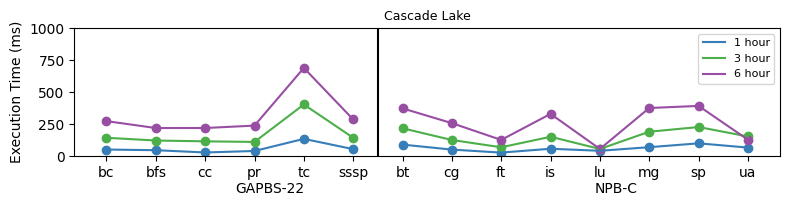

In [33]:
app_gap = df_gap22_dc_cas['app']
gap = df_gap22_dc_cas['simSeconds'].astype(float) * 1000
gap_3hr = df_gap22_dc_cas_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_dc_cas_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])

x = np.arange(6)*4+1
plt.plot(x, gap, label='1 hour', color=cmap(1))
plt.plot(x, gap_3hr, label='3 hour', color=cmap(2))
plt.plot(x, gap_6hr, label='6 hour', color=cmap(3))
plt.scatter(x, gap, color=cmap(1))
plt.scatter(x, gap_3hr, color=cmap(2))
plt.scatter(x, gap_6hr, color=cmap(3))

app_npb = df_npbC_dc_cas['app']
npb = df_npbC_dc_cas['simSeconds'].astype(float) * 1000
npb_3hr = df_npbC_dc_cas_3hr['simSeconds'].astype(float) * 1000
npb_6hr = df_npbC_dc_cas_6hr['simSeconds'].astype(float) * 1000
x=np.arange(6,14)*4+1
plt.plot(x, npb, color=cmap(1))
plt.plot(x, npb_3hr, color=cmap(2))
plt.plot(x, npb_6hr, color=cmap(3))
plt.scatter(x, npb, color=cmap(1))
plt.scatter(x, npb_3hr, color=cmap(2))
plt.scatter(x, npb_6hr, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=23, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("Cascade Lake", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

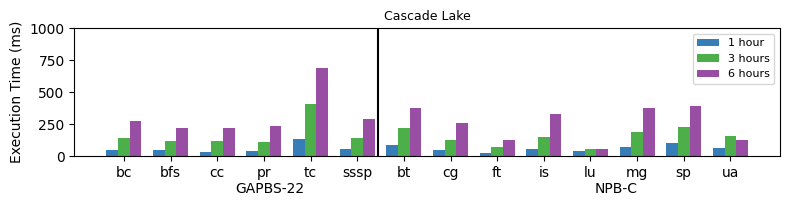

In [7]:
app_gap = df_gap22_dc_cas['app']
gap = df_gap22_dc_cas['simSeconds'].astype(float) * 1000
gap_3h = df_gap22_dc_cas_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_dc_cas_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap[i],   width=1, color=cmap(1), label='1 hour' if i==0 else None)
    plt.bar(i*4+1, gap_3h[i],   width=1, color=cmap(2), label='3 hours' if i==0 else None)
    plt.bar(i*4+2, gap_6hr[i],   width=1, color=cmap(3), label='6 hours' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_dc_cas['app']
npb_cas = df_npbC_dc_cas['simSeconds'].astype(float) * 1000
npb_cas_3hr = df_npbC_dc_cas_3hr['simSeconds'].astype(float) * 1000
npb_cas_6hr = df_npbC_dc_cas_6hr['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_cas_3hr[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_cas_6hr[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("Cascade Lake", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

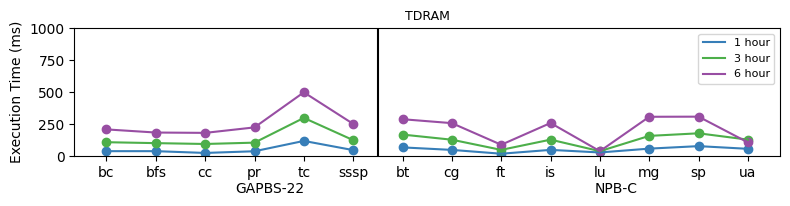

In [37]:
app_gap = df_gap22_dc_ram['app']
gap = df_gap22_dc_ram['simSeconds'].astype(float) * 1000
gap_3hr = df_gap22_dc_ram_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_dc_ram_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])

x = np.arange(6)*4+1
plt.plot(x, gap, label='1 hour', color=cmap(1))
plt.plot(x, gap_3hr, label='3 hour', color=cmap(2))
plt.plot(x, gap_6hr, label='6 hour', color=cmap(3))
plt.scatter(x, gap, color=cmap(1))
plt.scatter(x, gap_3hr, color=cmap(2))
plt.scatter(x, gap_6hr, color=cmap(3))

app_npb = df_npbC_dc_ram['app']
npb = df_npbC_dc_ram['simSeconds'].astype(float) * 1000
npb_3hr = df_npbC_dc_ram_3hr['simSeconds'].astype(float) * 1000
npb_6hr = df_npbC_dc_ram_6hr['simSeconds'].astype(float) * 1000
x=np.arange(6,14)*4+1
plt.plot(x, npb, color=cmap(1))
plt.plot(x, npb_3hr, color=cmap(2))
plt.plot(x, npb_6hr, color=cmap(3))
plt.scatter(x, npb, color=cmap(1))
plt.scatter(x, npb_3hr, color=cmap(2))
plt.scatter(x, npb_6hr, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=23, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("TDRAM", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

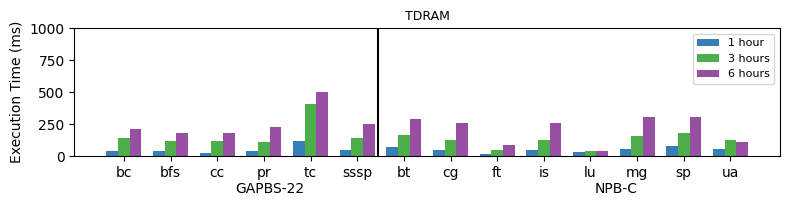

In [36]:
app_gap = df_gap22_dc_ram['app']
gap = df_gap22_dc_ram['simSeconds'].astype(float) * 1000
gap_3hr = df_gap22_dc_ram_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_dc_ram_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap[i],   width=1, color=cmap(1), label='1 hour' if i==0 else None)
    plt.bar(i*4+1, gap_3h[i],   width=1, color=cmap(2), label='3 hours' if i==0 else None)
    plt.bar(i*4+2, gap_6hr[i],   width=1, color=cmap(3), label='6 hours' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_dc_ram['app']
npb = df_npbC_dc_ram['simSeconds'].astype(float) * 1000
npb_3hr = df_npbC_dc_ram_3hr['simSeconds'].astype(float) * 1000
npb_6hr = df_npbC_dc_ram_6hr['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_3hr[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_6hr[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("TDRAM", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

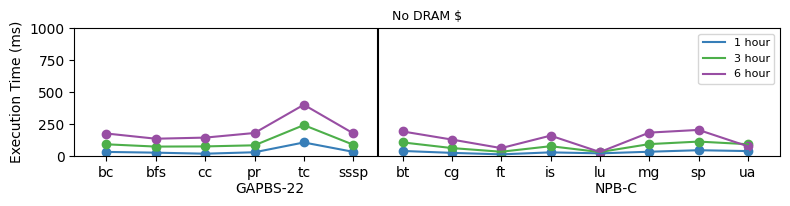

In [38]:
app_gap = df_gap22_noDC['app']
gap = df_gap22_noDC['simSeconds'].astype(float) * 1000
gap_3hr = df_gap22_noDC_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_noDC_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])

x = np.arange(6)*4+1
plt.plot(x, gap, label='1 hour', color=cmap(1))
plt.plot(x, gap_3hr, label='3 hour', color=cmap(2))
plt.plot(x, gap_6hr, label='6 hour', color=cmap(3))
plt.scatter(x, gap, color=cmap(1))
plt.scatter(x, gap_3hr, color=cmap(2))
plt.scatter(x, gap_6hr, color=cmap(3))

app_npb = df_npbC_noDC['app']
npb = df_npbC_noDC['simSeconds'].astype(float) * 1000
npb_3hr = df_npbC_noDC_3hr['simSeconds'].astype(float) * 1000
npb_6hr = df_npbC_noDC_6hr['simSeconds'].astype(float) * 1000
x=np.arange(6,14)*4+1
plt.plot(x, npb, color=cmap(1))
plt.plot(x, npb_3hr, color=cmap(2))
plt.plot(x, npb_6hr, color=cmap(3))
plt.scatter(x, npb, color=cmap(1))
plt.scatter(x, npb_3hr, color=cmap(2))
plt.scatter(x, npb_6hr, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=23, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("No DRAM $", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

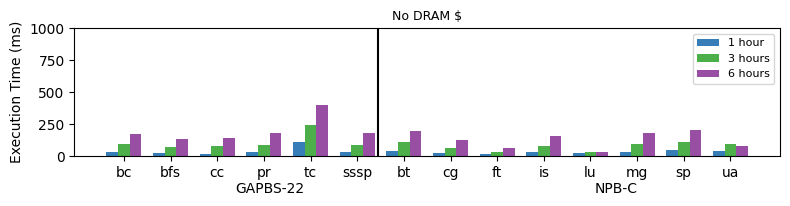

In [12]:
app_gap = df_gap22_noDC['app']
gap = df_gap22_noDC['simSeconds'].astype(float) * 1000
gap_3h = df_gap22_noDC_3hr['simSeconds'].astype(float) * 1000
gap_6hr = df_gap22_noDC_6hr['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,1000])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap[i],   width=1, color=cmap(1), label='1 hour' if i==0 else None)
    plt.bar(i*4+1, gap_3h[i],   width=1, color=cmap(2), label='3 hours' if i==0 else None)
    plt.bar(i*4+2, gap_6hr[i],   width=1, color=cmap(3), label='6 hours' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_noDC['app']
npb = df_npbC_noDC['simSeconds'].astype(float) * 1000
npb_3hr = df_npbC_noDC_3hr['simSeconds'].astype(float) * 1000
npb_6hr = df_npbC_noDC_6hr['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_3hr[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_6hr[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("No DRAM $", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")